In [2]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt


#import data from csv obtained using libra on android. 
df = pd.read_csv('weight_data_JAN_4.csv', delimiter=';')

#drop unused columns
df = df.drop(columns=['body fat', 'body fat trend','comment'])

df.head(5)

,#date,weight,weight trend
0,2020-11-01 17:40:00,65.3,65.300000
1,2020-11-02 17:27:00,65.4,65.313200
2,2020-11-03 17:21:00,65.1,65.284930
3,2020-11-04 17:39:00,65.1,65.260025
4,2020-11-05 17:22:00,65.2,65.252120


In [3]:
#rename columns and check dtypes. 
df.columns = ['date', 'weight', 'weight trend']
df.dtypes

date             object
weight          float64
weight trend    float64
dtype: object

In [4]:

#convert date columns to datetime and add month and day columns for furhter analysis. 
df.date = pd.to_datetime(df.date)
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day


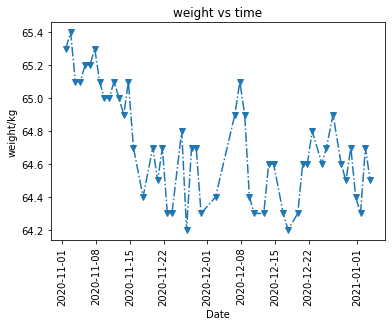

In [11]:
#plot weight w.r.t time. 

X = df.date
y = df.weight
plt.title('weight vs time', fontdict={'family':'sans serif'})
plt.plot(X,y, 'v-.')
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("weight/kg")
plt.show()


In [21]:
#change in median weight as weeks pass by. 
dg = df.groupby(pd.Grouper(key="date", freq="1W")).median()
dg.drop(columns=['month', 'day', 'weight trend'])


array([65.3 , 65.2 , 65.  , 64.5 , 64.5 , 64.65, 64.5 , 64.3 , 64.7 ,
       64.5 ])

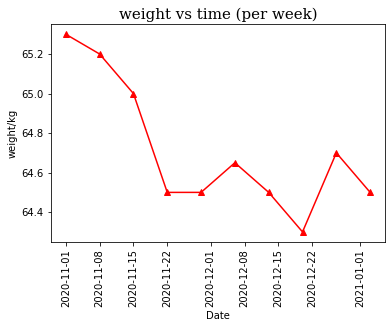

In [30]:
#plot for median weight grouped by weeks. 
X = dg.weight.index
y = dg.weight.values
plt.title('weight vs time (per week)', fontdict={'family':'serif', 'size': '15'})
plt.plot(X,y, 'r-^')
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("weight/kg")
plt.show()